# Develop a program to implement k-means clustering using Wisconsin Breast Cancer data set and visualize the clustering result.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Data Preparation:
- Loads the Wisconsin Breast Cancer dataset
- Standardizes features to ensure equal weight in clustering
- This is crucial as k-means is sensitive to feature scaling

In [4]:
# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##  K-means Implementation:
- Implements k-means with k=2 (since we know there are two classes: malignant and benign)
- Fits the model and predicts clusters

In [6]:
# Initialize and fit k-means (k=2 since we know there are 2 classes)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Evaluation:
- Compares clustering results with actual labels
- Calculates accuracy (noting that cluster labels might be reversed)

In [7]:
# Compare clusters with actual labels
# Note: Cluster labels might be reversed (0->1, 1->0) but that's okay
matches = sum(np.abs(clusters - y)) if sum(clusters == y) < len(y)/2 else sum(clusters == y)
accuracy = matches / len(y)
print(f"Clustering accuracy: {accuracy:.2f}")

Clustering accuracy: 0.91


## Visualization:
- Uses PCA to reduce data to 2 dimensions
- Creates a scatter plot showing the clusters
- Different colors represent different clusters

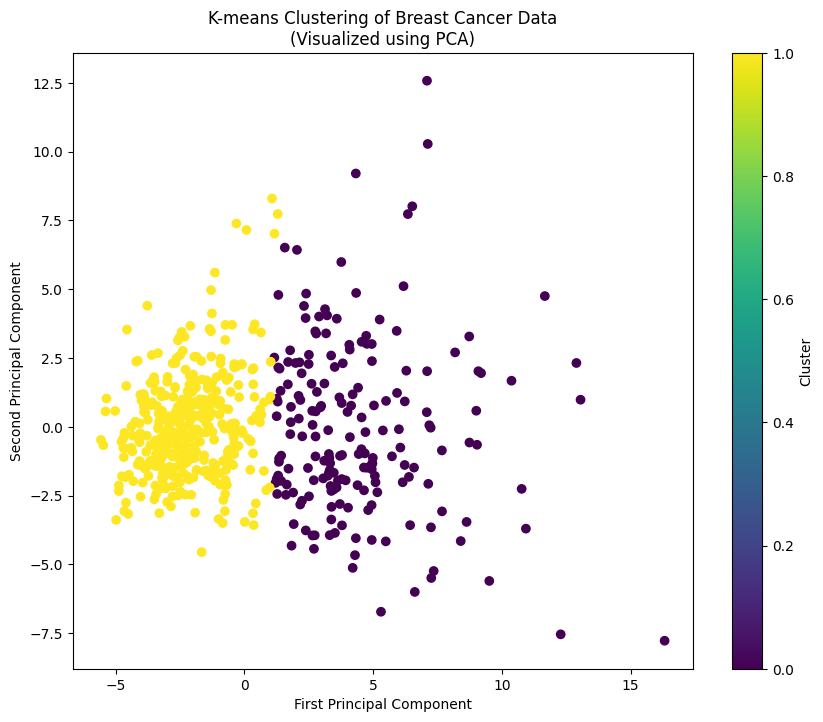

In [8]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering of Breast Cancer Data\n(Visualized using PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Cluster')
plt.show()